# Smartphone Price Prediction

## Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load the dataset

In [4]:
df = pd.read_csv("resources/phones_data.csv")
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


## Check for missing data

In [6]:
df.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

# Drop the missing data

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0        0
brand_name        0
model_name        0
os                0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
dtype: int64

## Statistical Summary

In [9]:
df.describe()

,Unnamed: 0,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,635.810256,729.238462,10203.064103,9214.326923,11751.229487,20.226923,6.060462,112.287179,4121.117949
std,342.304633,338.209052,9612.168455,8652.375633,11693.361223,22.330371,0.626583,117.754426,1406.849509
min,0.000000,2.000000,1036.000000,899.000000,1059.000000,2.000000,2.400000,4.000000,1500.000000
25%,374.750000,475.500000,3759.000000,3499.000000,3999.000000,4.000000,5.700000,32.000000,3174.000000
50%,641.500000,783.500000,5931.000000,5547.000000,6512.500000,11.000000,6.215000,64.000000,4000.000000
75%,909.250000,1017.250000,13904.250000,12425.500000,16057.750000,29.000000,6.500000,128.000000,5000.000000
max,1222.000000,1224.000000,55338.000000,45799.000000,64999.000000,125.000000,8.100000,1000.000000,13000.000000


## Feature Engineering

In [10]:
df.sample(20)

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
448,448,Samsung,Galaxy M31s 6/128GB Blue (SM-M317FZBN),Android,1184,8359.0,7429.0,9199.0,55,6.50,128.0,6000.0,9-2020
870,870,DOOGEE,S40 Pro 4/64GB Black,Android,557,3590.0,3269.0,3795.0,10,5.45,64.0,4650.0,11-2020
392,392,Samsung,Galaxy A20s 2019 A207F 3/32GB Black (SM-A207FZKD),Android,1017,4126.0,3599.0,4399.0,13,6.50,32.0,4000.0,10-2019
605,605,Xiaomi,Mi 10T 6/128GB Cosmic Black,Android,1154,12778.0,12077.0,14728.0,49,6.67,128.0,5000.0,10-2020
156,156,Blackview,A30 2/16GB Black,Android,240,1852.0,1795.0,1910.0,2,5.50,16.0,2500.0,9-2018
1156,1156,Apple,iPhone 12 Pro Max 512GB Dual Sim Pacific Blue ...,iOS,872,49242.0,45120.0,64999.0,33,6.70,512.0,3687.0,11-2020
879,879,DOOGEE,S58 Pro 6/64GB Black,Android,986,4998.0,4270.0,5999.0,22,5.71,64.0,5180.0,9-2020
1140,1140,Apple,iPhone 12 128GB Black (MGJA3/MGHC3),iOS,1213,28735.0,25380.0,35499.0,125,6.10,128.0,2815.0,10-2020
698,698,HUAWEI,P30 6/128GB Black (51093NDK),Android,993,15464.0,14801.0,19999.0,17,6.10,128.0,3650.0,3-2019
1137,1137,Apple,iPhone 11 Pro Max 64GB Dual Sim Space Gray (MW...,iOS,628,32583.0,29328.0,35717.0,37,6.50,64.0,3969.0,10-2019


Create a phone_age feature from the by subtracting current_year and the year of the release date

In [11]:
from datetime import datetime

current_year = datetime.now().year
df['phone_age'] = current_year - df['release_date'].str.split('-', expand=True)[1].astype(int)

In [12]:
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,phone_age
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.0,8.0,2000.0,10-2020,4
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020,4
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020,4
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020,4
5,5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.8,64.0,3400.0,6-2018,6


Get the color of the phone from the model_name feature

In [13]:
def extract_color(model_name):
	color_list = [
		'Red',
		'Green',
		'Blue',
		'Yellow',
		'Cyan',
		'Magenta',
		'Black',
		'White',
		'Gray',
		'Grey',
		'Orange',
		'Purple',
		'Brown',
		'Pink',
		'Violet',
		'Indigo',
		'Turquoise',
		'Teal',
		'Lime',
		'Maroon',
		'Olive',
		'Navy',
		'Silver',
		'Gold',
		'Charcoal',
		'Gradient',
		'Jade',
		'Gunmetal',
		'Copper'
	]
	for color in color_list:
		if color.lower() in model_name.lower():
			return color
	return None

# Apply the function to create a new column
df['color'] = df['model_name'].apply(extract_color)

In [14]:
df

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,phone_age,color
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020,4,Black
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,4,Black
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,4,Black
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,4,Black
5,5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6-2018,6,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1218,Apple,iPhone XS Max 512GB Space Gray (MT622),iOS,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,9-2018,6,Gray
1219,1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,9-2018,6,Gold
1220,1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,9-2018,6,Gold
1221,1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019,5,Black


In [15]:
df.isnull().sum()

Unnamed: 0         0
brand_name         0
model_name         0
os                 0
popularity         0
best_price         0
lowest_price       0
highest_price      0
sellers_amount     0
screen_size        0
memory_size        0
battery_size       0
release_date       0
phone_age          0
color             35
dtype: int64

In [16]:
drop_col = ['release_date', 'model_name', 'Unnamed: 0']
df.drop(drop_col, inplace = True, axis = 1)

object_columns = df.select_dtypes(include = ['object']).columns
df[object_columns]

,brand_name,os,color
0,ALCATEL,Android,Black
1,ALCATEL,Android,Black
2,ALCATEL,Android,Black
3,ALCATEL,Android,Black
5,Honor,Android,Black
...,...,...,...
1218,Apple,iOS,Gray
1219,Apple,iOS,Gold
1220,Apple,iOS,Gold
1221,HUAWEI,Android,Black


In [17]:
df[object_columns]

,brand_name,os,color
0,ALCATEL,Android,Black
1,ALCATEL,Android,Black
2,ALCATEL,Android,Black
3,ALCATEL,Android,Black
5,Honor,Android,Black
...,...,...,...
1218,Apple,iOS,Gray
1219,Apple,iOS,Gold
1220,Apple,iOS,Gold
1221,HUAWEI,Android,Black


In [18]:
for column in object_columns:
	unique_values = df[column].unique()
	print(f"Unique values in '{column}':")
	print(unique_values)
	print()

Unique values in 'brand_name':
['ALCATEL' 'Honor' 'Meizu' 'Nokia' 'OnePlus' 'realme' 'AGM' 'OPPO'
 'Blackview' 'Lenovo' 'UMIDIGI' 'Sharp' 'Ulefone' 'DOOGEE' 'Xiaomi' 'ZTE'
 'Oukitel' 'Cubot' 'Tecno' 'Coolpad' 'Archos' '2E' 'Motorola' 'LG'
 'Samsung' 'BlackBerry' 'HUAWEI' 'Vernee' 'Google' 'ASUS' 'Bluboo' 'CAT'
 'Philips' 'Vodafone' 'Microsoft' 'Elephone' 'HTC' 'vivo' 'Sigma mobile'
 'Sony' 'LEAGOO' 'Apple']

Unique values in 'os':
['Android' 'iOS' 'OxygenOS' 'EMUI' 'KAIOS']

Unique values in 'color':
['Black' 'Blue' 'Purple' 'White' 'Gray' 'Green' 'Charcoal' 'Gunmetal' None
 'Silver' 'Red' 'Orange' 'Gold' 'Grey' 'Gradient' 'Jade' 'Copper' 'Pink'
 'Navy' 'Yellow' 'Indigo' 'Brown']



# One-Hot encoding

In [19]:
df1 = pd.get_dummies(df, columns=object_columns)

In [20]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,phone_age,brand_name_2E,...,color_Indigo,color_Jade,color_Navy,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_White,color_Yellow
0,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,4,False,...,False,False,False,False,False,False,False,False,False,False
1,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,4,False,...,False,False,False,False,False,False,False,False,False,False
2,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,4,False,...,False,False,False,False,False,False,False,False,False,False
3,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,4,False,...,False,False,False,False,False,False,False,False,False,False
5,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1219,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1220,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1221,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,5,False,...,False,False,False,False,False,False,False,False,False,False


## Feature Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

non_boolean_numerical_features = ["popularity",'best_price','lowest_price','highest_price','sellers_amount','screen_size','memory_size','battery_size']
scaler = MinMaxScaler()
df1[non_boolean_numerical_features] = scaler.fit_transform(df1[non_boolean_numerical_features])


In [22]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,phone_age,brand_name_2E,...,color_Indigo,color_Jade,color_Navy,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_White,color_Yellow
0,0.343699,0.012044,0.014031,0.011886,0.276423,0.456140,0.004016,0.043478,4,False,...,False,False,False,False,False,False,False,False,False,False
1,0.262684,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,False,False,False,False,False,False
2,0.243044,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,False,False,False,False,False,False
3,0.233224,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,False,False,False,False,False,False
5,0.056465,0.181006,0.216748,0.157022,0.000000,0.596491,0.060241,0.165217,6,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.481640,0.451024,0.455755,0.365854,0.719298,0.510040,0.145565,6,False,...,False,False,False,False,False,False,False,False,False,False
1219,0.899345,0.398678,0.336726,0.419784,0.479675,0.719298,0.060241,0.145565,6,False,...,False,False,False,False,False,False,False,False,False,False
1220,0.432079,0.433944,0.468597,0.510807,0.211382,0.719298,0.060241,0.145565,6,False,...,False,False,False,False,False,False,False,False,False,False
1221,0.959083,0.143052,0.158129,0.139819,0.130081,0.677193,0.124498,0.195652,5,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
y_scaled = df1['best_price']
y_scaled

0       0.012044
1       0.014125
2       0.014125
3       0.014125
5       0.181006
          ...   
1218    0.481640
1219    0.398678
1220    0.433944
1221    0.143052
1222    0.326305
Name: best_price, Length: 780, dtype: float64

In [24]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,phone_age,brand_name_2E,...,color_Indigo,color_Jade,color_Navy,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_White,color_Yellow
0,0.343699,0.012044,0.014031,0.011886,0.276423,0.456140,0.004016,0.043478,4,False,...,False,False,False,False,False,False,False,False,False,False
1,0.262684,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,False,False,False,False,False,False
2,0.243044,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,False,False,False,False,False,False
3,0.233224,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,4,False,...,False,False,False,False,False,False,False,False,False,False
5,0.056465,0.181006,0.216748,0.157022,0.000000,0.596491,0.060241,0.165217,6,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.481640,0.451024,0.455755,0.365854,0.719298,0.510040,0.145565,6,False,...,False,False,False,False,False,False,False,False,False,False
1219,0.899345,0.398678,0.336726,0.419784,0.479675,0.719298,0.060241,0.145565,6,False,...,False,False,False,False,False,False,False,False,False,False
1220,0.432079,0.433944,0.468597,0.510807,0.211382,0.719298,0.060241,0.145565,6,False,...,False,False,False,False,False,False,False,False,False,False
1221,0.959083,0.143052,0.158129,0.139819,0.130081,0.677193,0.124498,0.195652,5,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
x = df1.drop(['best_price','highest_price','lowest_price'],axis=1)
x

,popularity,sellers_amount,screen_size,memory_size,battery_size,phone_age,brand_name_2E,brand_name_AGM,brand_name_ALCATEL,brand_name_ASUS,...,color_Indigo,color_Jade,color_Navy,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_White,color_Yellow
0,0.343699,0.276423,0.456140,0.004016,0.043478,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.262684,0.276423,0.456140,0.012048,0.043478,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.243044,0.276423,0.456140,0.012048,0.043478,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.233224,0.276423,0.456140,0.012048,0.043478,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,0.056465,0.000000,0.596491,0.060241,0.165217,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.365854,0.719298,0.510040,0.145565,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1219,0.899345,0.479675,0.719298,0.060241,0.145565,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1220,0.432079,0.211382,0.719298,0.060241,0.145565,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1221,0.959083,0.130081,0.677193,0.124498,0.195652,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Split the dataset

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [29]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0073144296836584344
Testing MSE: 1.832969786595886e+20
Training R2 Score: 0.7752476907441685
Testing R2 Score: -7.036085035918397e+21


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
	<h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

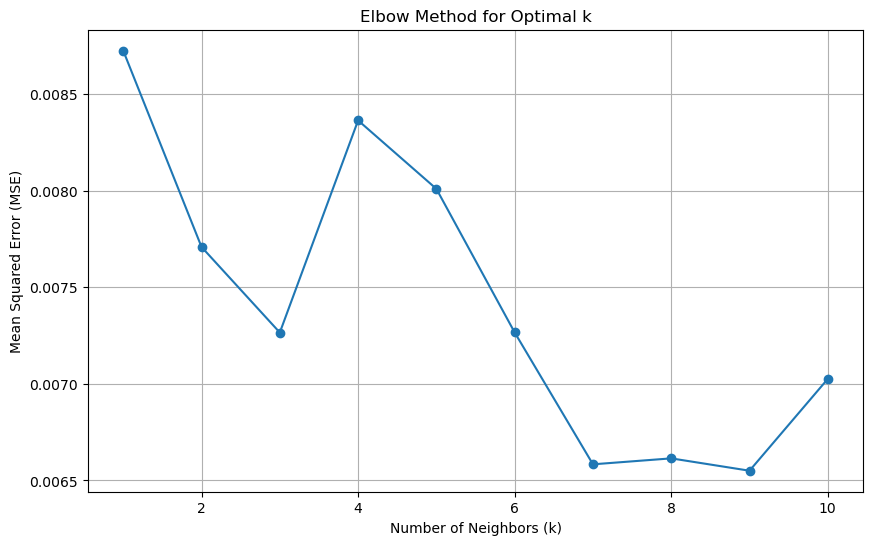

In [30]:
mse_values = []
r2_values = []
max_neighbors = 10
for k in range(1, max_neighbors + 1):
	knn = KNeighborsRegressor(n_neighbors=k)
	knn.fit(X_train, y_train)
	y_pred = knn.predict(X_test)
	mse = mean_squared_error(y_test, y_pred)
	r2 = r2_score(y_test, y_pred)
	mse_values.append(mse)
	r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [31]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 9


In [32]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [33]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [34]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.008854783559735124
Testing MSE: 0.006550491065615913
Training R2 Score: 0.7279168521563197
Testing R2 Score: 0.7485511626992318


In [45]:
print(f"Score: {knn.score(X_test, y_test)}")

Score: 0.7485511626992318
